In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Load the dataset

In [ ]:
from google.colab import files
facebook_data = files.upload()

Saving facebook_combined.txt to facebook_combined.txt


Number of nodes: 4039
Number of edges: 88234
Is the graph directed: False
Graph density: 0.010819963503439287


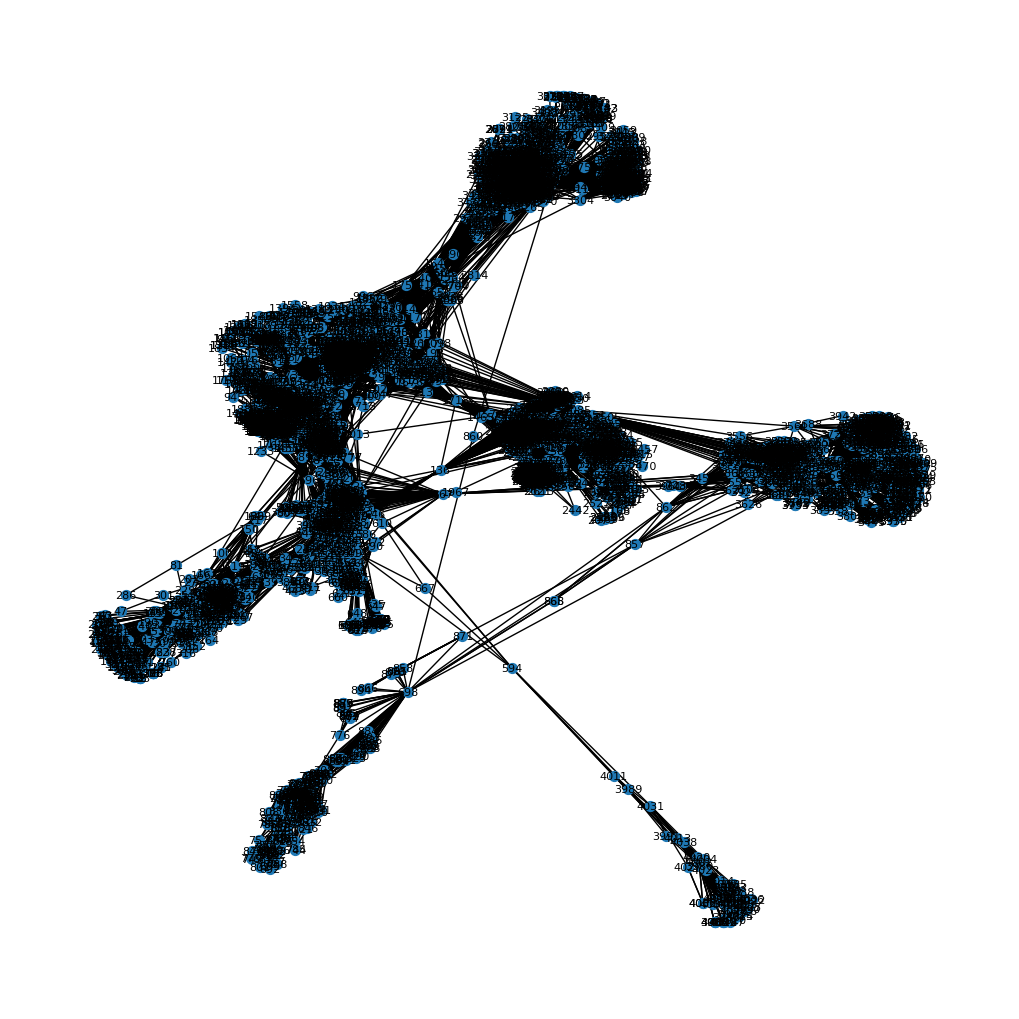

In [ ]:
# Load the dataset
# Assuming the dataset is in a file called 'facebook_combined.txt'
# The file contains edges in the format: node1 node2

G = nx.read_edgelist('facebook_combined.txt')

# Basic info about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")
print(f"Graph density: {nx.density(G)}")

# Define start and goal nodes
start_node = '0'  # Example start node
goal_node = '100'  # Example goal node

# Ensure start_node and goal_node are in the graph
if start_node not in G or goal_node not in G:
    raise ValueError("Start or goal node not in graph")
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.show()

In [ ]:
# Implementing BFS to find the shortest path between two nodes
def bfs_shortest_path(graph, start, goal):
    try:
        # Use nx.shortest_path with method=None for unweighted BFS
        path = nx.shortest_path(graph, source=start, target=goal)
        return path
    except nx.NetworkXNoPath:
        return None

start_node = '0'
goal_node = '100'
path = bfs_shortest_path(G, start_node, goal_node)
if path:
    print(f"BFS Shortest Path from {start_node} to {goal_node}: {path}")
else:
    print(f"No path found between {start_node} and {goal_node}")



BFS Shortest Path from 0 to 100: ['0', '100']


In [ ]:
def dfs_explore(graph, start):
    visited = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in visited:
            print(f"{node}", end =", ")
            visited.add(node)
             # Add all adjacent nodes that haven't been explored yet
            stack.extend(n for n in graph.neighbors(node) if n not in visited)
start_node = '0'
print(f"Exploring connections starting from node {start_node}:")
dfs_explore(G, start_node)

Exploring connections starting from node 0:
0, 347, 339, 340, 324, 332, 331, 271, 342, 325, 313, 315, 345, 322, 341, 323, 308, 338, 252, 334, 318, 261, 314, 236, 304, 285, 303, 239, 344, 311, 277, 294, 77, 231, 329, 320, 346, 330, 302, 299, 300, 130, 257, 295, 258, 291, 280, 297, 272, 281, 309, 284, 251, 197, 184, 159, 172, 298, 265, 248, 200, 276, 232, 224, 213, 249, 266, 254, 242, 204, 196, 194, 187, 180, 101, 317, 158, 168, 129, 31, 237, 84, 83, 51, 25, 336, 88, 186, 223, 246, 136, 2660, 2659, 2658, 2657, 2648, 2647, 2645, 2640, 2639, 2636, 2633, 2627, 2620, 2626, 2585, 2538, 2494, 2583, 2459, 2531, 2616, 2653, 2642, 2649, 2643, 2629, 2609, 2598, 2635, 2533, 2597, 2608, 2617, 2652, 2603, 2610, 2641, 2557, 2637, 2540, 2634, 2421, 2437, 2204, 2034, 2321, 2581, 2565, 2017, 2296, 2612, 2566, 2523, 2488, 2644, 2628, 2618, 2614, 2656, 2562, 2448, 2440, 2577, 2587, 2570, 2535, 2487, 2301, 2281, 2245, 2094, 2167, 1912, 2655, 2654, 2646, 2638, 2630, 2631, 2625, 2624, 2623, 2615, 2619, 2611, 

Shortest path from 0 to 100 using BFS: ['0', '100']
0, 347, 339, 340, 324, 332, 331, 271, 342, 325, 313, 315, 345, 322, 341, 323, 308, 338, 252, 334, 318, 261, 314, 236, 304, 285, 303, 239, 344, 311, 277, 294, 77, 231, 329, 320, 346, 330, 302, 299, 300, 130, 257, 295, 258, 291, 280, 297, 272, 281, 309, 284, 251, 197, 184, 159, 172, 298, 265, 248, 200, 276, 232, 224, 213, 249, 266, 254, 242, 204, 196, 194, 187, 180, 101, 317, 158, 168, 129, 31, 237, 84, 83, 51, 25, 336, 88, 186, 223, 246, 136, 2660, 2659, 2658, 2657, 2648, 2647, 2645, 2640, 2639, 2636, 2633, 2627, 2620, 2626, 2585, 2538, 2494, 2583, 2459, 2531, 2616, 2653, 2642, 2649, 2643, 2629, 2609, 2598, 2635, 2533, 2597, 2608, 2617, 2652, 2603, 2610, 2641, 2557, 2637, 2540, 2634, 2421, 2437, 2204, 2034, 2321, 2581, 2565, 2017, 2296, 2612, 2566, 2523, 2488, 2644, 2628, 2618, 2614, 2656, 2562, 2448, 2440, 2577, 2587, 2570, 2535, 2487, 2301, 2281, 2245, 2094, 2167, 1912, 2655, 2654, 2646, 2638, 2630, 2631, 2625, 2624, 2623, 2615, 2619

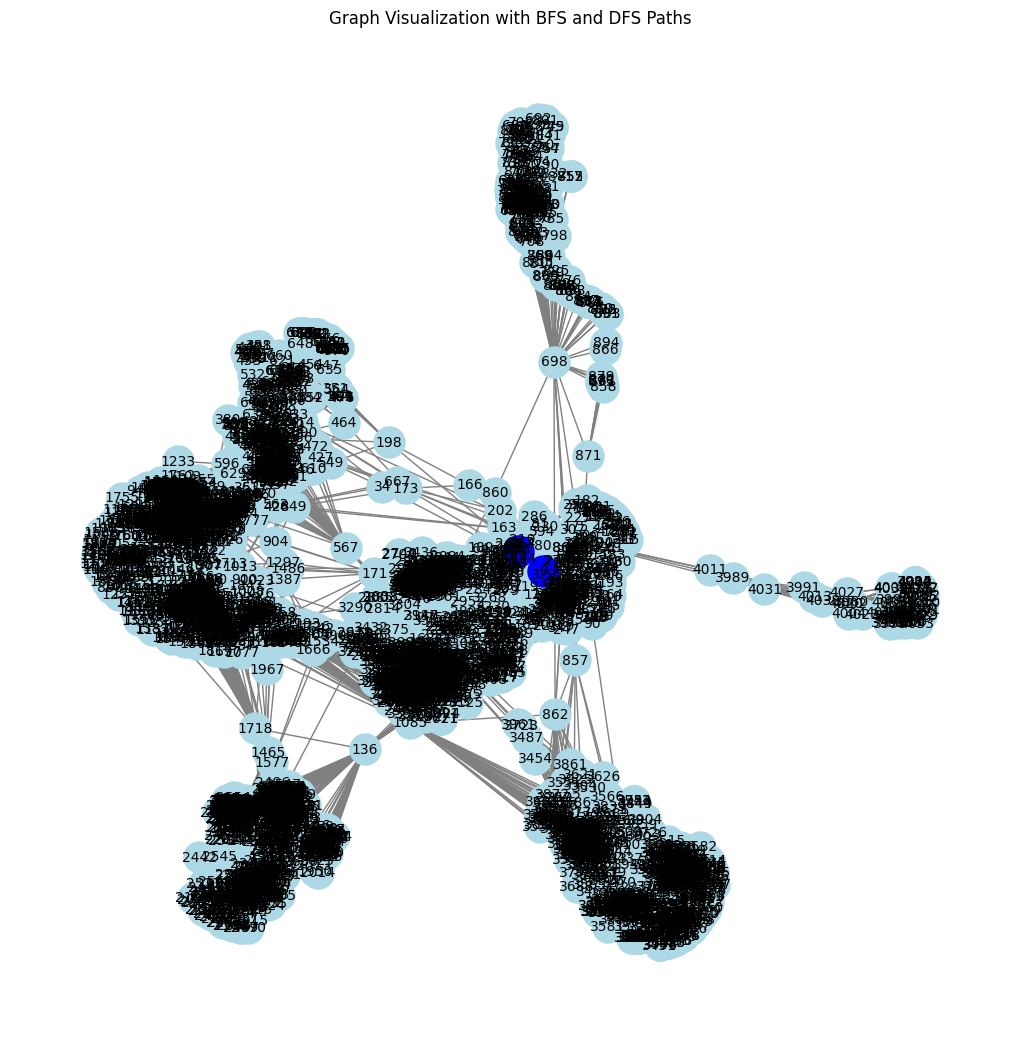

In [ ]:
def visualize_graph(graph, bfs_path=None, dfs_path=None):
    pos = nx.spring_layout(graph)  # Layout for visualization

    plt.figure(figsize=(10, 10))

    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')

    # Highlight BFS path
    if bfs_path:
        path_edges = list(zip(bfs_path, bfs_path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='blue', width=2)
        nx.draw_networkx_nodes(graph, pos, nodelist=bfs_path, node_color='blue', node_size=500)

    # Highlight DFS path
    if dfs_path:
        path_edges = list(zip(dfs_path, dfs_path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2, style='dashed')
        nx.draw_networkx_nodes(graph, pos, nodelist=dfs_path, node_color='red', node_size=500)

    plt.title("Graph Visualization with BFS and DFS Paths")
    plt.show()

# Example usage for BFS:
start_node = '0'
goal_node = '100'
bfs_path = bfs_shortest_path(G, start_node, goal_node)
if bfs_path:
    print(f"Shortest path from {start_node} to {goal_node} using BFS: {bfs_path}")
else:
    print(f"No path found between {start_node} and {goal_node} using BFS")

# Example usage for DFS:
start_node = '0'
dfs_path = dfs_explore(G, start_node)
print(f"DFS exploration path starting from {start_node}: {dfs_path}")

# Visualize the graph and paths
visualize_graph(G, bfs_path, dfs_path)